# 集成算法 RandomForest

**集成学习**（ensemble learning）是时下非常流行的机器学习算法，它本身不是一个单独的机器学习算法，而是通
过在数据上构建多个模型，集成所有模型的建模结果。基本上所有的机器学习领域都可以看到集成学习的身影，在
现实中集成学习也有相当大的作用，它可以用来做市场营销模拟的建模，统计客户来源，保留和流失，也可用来预
测疾病的风险和病患者的易感性。在现在的各种算法竞赛中，随机森林，梯度提升树（GBDT），Xgboost等集成
算法的身影也随处可见，可见其效果之好，应用之广。

多个模型集成成为的模型叫做集成评估器（ensemble estimator），组成集成评估器的每个模型都叫做基评估器
（base estimator）。通常来说，有三类集成算法：装袋法（Bagging），提升法（Boosting）和stacking。

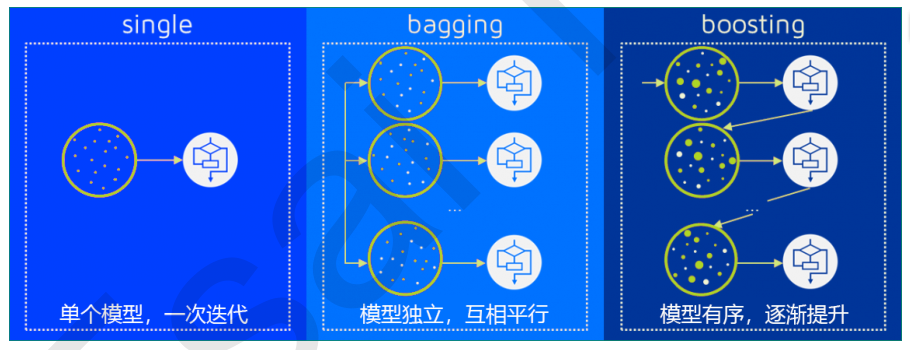

**装袋法**：   装袋法的核心思想是构建多个相互独立的评估器，然后对其预测进行平均或多数表决原则来决定集成评估器的结
果。装袋法的代表模型就是随机森林。

**提升法：**  提升法中，基评估器是相关的，是按顺序一一构建的。其核心思想是结合弱评估器的力量一次次对难以评估的样本
进行预测，从而构成一个强评估器。提升法的代表模型有Adaboost和（GBDT）梯度提升树。

## 随机森林分类RandomForestClassifier
随机森林是非常具有代表性的Bagging集成算法，它的所有基评估器都是决策树，分类树组成的森林就叫做随机森
林分类器，回归树所集成的森林就叫做随机森林回归器。

In [3]:
%matplotlib inline

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [7]:
wine = load_wine()

In [9]:
wine.data.shape

(178, 13)

In [15]:
from sklearn.model_selection import train_test_split,cross_val_score
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [13]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)
print("Single Tree:{}".format(score_c),"Random Forest:{}".format(score_r))


Single Tree:0.9259259259259259 Random Forest:0.9814814814814815


In [16]:
#交叉验证：是数据集划分为n分，依次取每一份做测试集，每n-1份做训练集，多次训练模型以观测模型稳定性的方法
rfc_l = []
clf_l = []
for i in range(10):
      rfc = RandomForestClassifier(n_estimators=25)
      rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
      rfc_l.append(rfc_s)
      clf = DecisionTreeClassifier()
      clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
      clf_l.append(clf_s)


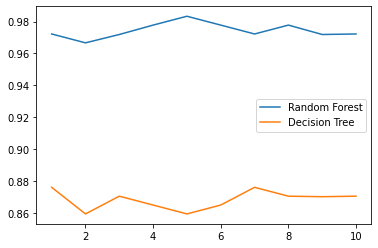

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

n_estimators的学习曲线

**规律：** 随机森林的好坏 和 决策树的好坏 成正相关    

**n_estimators 学习曲线绘制**

In [29]:
superpa = []
for i in range(20):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))



0.9833333333333334 18


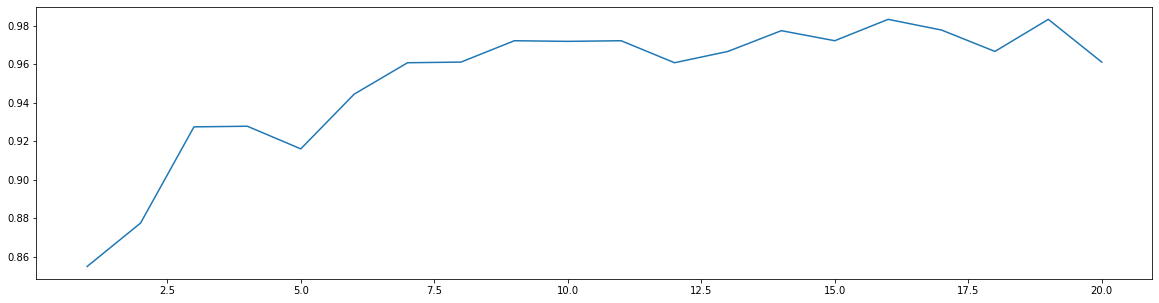

In [30]:
plt.figure(figsize=[20,5])
plt.plot(range(1,21),superpa)
plt.show()

随机森林用了什么方法，来保证集成的效果一定好于单个分类器？

随机森林的本质 是 一种 装袋集成算法（bagging） 装袋集成算法 是对 基评估器的预测结果平均 或用 少数 服从多数的原则来决定集成评估器的结果。
例如，我们建立了5 棵树， 只有当三个数同时判断错时， 集成评估器才会判断错。
假设  一棵树的 判错概率为 0.2 则三棵树都判错的概率为：0.0579
**注意： 一个重要的前提是  基评估器（这里的 基评估器的 决策树）的预测结果 准确性 最少要 达到 百分之50以上 否则就回越来越差**

In [33]:
import numpy as np
from scipy.special import comb

In [41]:
np.array([comb(5,i)*(0.2**i)*(0.8**(5-i)) for i in range(3,6)]).sum()

0.05792000000000003

### 重要参数 estimators_

In [45]:
rfc2 = RandomForestClassifier(n_estimators=20,random_state=2)
rfc2.fit(Xtrain,Ytrain)

RandomForestClassifier(n_estimators=20, random_state=2)

In [48]:
rfc2.estimators_[:5]

[DecisionTreeClassifier(max_features='auto', random_state=1872583848),
 DecisionTreeClassifier(max_features='auto', random_state=794921487),
 DecisionTreeClassifier(max_features='auto', random_state=111352301),
 DecisionTreeClassifier(max_features='auto', random_state=1853453896),
 DecisionTreeClassifier(max_features='auto', random_state=213298710)]

In [53]:
rfc2.score(Xtest,Ytest)

0.9629629629629629

In [60]:
rfc2.feature_importances_  # 这种越大  特征越重要

array([0.18354373, 0.01795786, 0.01282391, 0.01881506, 0.03476482,
       0.06540983, 0.11864286, 0.00746185, 0.01546242, 0.10124211,
       0.09553771, 0.14364903, 0.18468882])

In [63]:
[*zip(wine.feature_names,rfc2.feature_importances_)]

[('alcohol', 0.18354372509684183),
 ('malic_acid', 0.01795785818955903),
 ('ash', 0.012823911068373375),
 ('alcalinity_of_ash', 0.018815062636324733),
 ('magnesium', 0.03476481505893094),
 ('total_phenols', 0.06540982919141082),
 ('flavanoids', 0.11864286319603982),
 ('nonflavanoid_phenols', 0.007461845054941237),
 ('proanthocyanins', 0.015462416355375172),
 ('color_intensity', 0.10124211109182447),
 ('hue', 0.0955377117073634),
 ('od280/od315_of_diluted_wines', 0.14364903110949875),
 ('proline', 0.18468882024351657)]

In [64]:
rfc2.apply(Xtest) # 返回样本 在树 中  叶子节点 所在的索引

array([[ 5,  3,  3, ...,  1,  7, 13],
       [ 5,  7,  3, ...,  1,  7, 15],
       [ 5,  3,  3, ...,  1,  7, 12],
       ...,
       [ 5,  3,  3, ...,  1,  7, 13],
       [24, 12, 15, ..., 18, 14, 18],
       [19,  5, 11, ..., 24,  4,  4]], dtype=int64)

In [57]:
rfc2.predict(Xtest)[:5]

array([2, 2, 2, 0, 0])

In [56]:
rfc2.predict_proba(Xtest)[:5]

array([[0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.1 , 0.9 ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ]])

In [59]:
rfc2.predict_log_proba(Xtest)[:5]

d:\install\python37\lib\site-packages\sklearn\ensemble\_forest.py:892: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


array([[       -inf,        -inf,  0.        ],
       [       -inf,        -inf,  0.        ],
       [       -inf, -2.30258509, -0.10536052],
       [-0.05129329, -2.99573227,        -inf],
       [ 0.        ,        -inf,        -inf]])

**我们发现 森林中 每一个 决策树的  随机状态 参数是不同的 保证了 森林 中的 树 不会 全部都一样**

随机森林 算法 对 数据的处理  默认  使用 有放回 采样 来 保证  每棵树 数据的 随机性,  数据的随机性也保证了 每棵树的参数的随机性，从而提升了模型的投票结果

**oob 袋外词 分数**  使用有放回采样过程中 没有采样到的数据 作为数据集 进行 验证的 结果 
defult  oob = False

### 重要参数  oob_score

In [49]:
rfc3 = RandomForestClassifier(n_estimators=20,oob_score=True)
rfc3.fit(wine.data,wine.target)  # 这里使用 整个 数据集 进行训练  然后 使用 没有采样到数据 进行验证
rfc3.oob_score_

0.9382022471910112

In [51]:
rfc3.feature_importances_  # 特征重要性

array([0.12318479, 0.03065503, 0.00630817, 0.01430552, 0.04043979,
       0.03166109, 0.17160972, 0.0105558 , 0.01446702, 0.20617543,
       0.09823457, 0.12706828, 0.12533478])

## 随机森林回归 RandomForestRegressor

In [66]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [70]:
# 进行 波士顿 房价预测
# 加载数据
boston = load_boston()

In [73]:
boston.data.shape

(506, 13)

In [75]:
boston.target.shape

(506,)

In [76]:
# 模型构建
rfr = RandomForestRegressor(n_estimators=100,random_state=0)

In [78]:
# 交叉验证
cross_val_score(rfr,boston.data,boston.target,cv=10,scoring="neg_mean_squared_error")

array([-11.22504076,  -5.3945749 ,  -4.74755867, -22.54699078,
       -12.31243335, -17.18030718,  -6.94019868, -94.14567212,
       -28.541145  , -14.6250416 ])

In [81]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())  # skleran 所有  打分 指标

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

### 实例： 用随机森林回归填补缺失值

现实中收集到的数据不可能完美无缺，都回存在一些缺失值，一种有效的方法 是对 缺失值进行填充，在Sklearn中，我们可以使用skleran.impute.SimpleImputer来轻松地进行平均值，中值 或者其他常用的数值补充到数据中。案例中， 我们使用 均值，0和 随机森林回归来进行填充缺失值

In [84]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer  # 填补缺失值的类
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [86]:
dataset = load_boston()

In [87]:
dataset.data.shape

(506, 13)

In [88]:
X_full,y_full = dataset.data,dataset.target

In [89]:
n_samples = dataset.data.shape[0]
n_features = dataset.data.shape[1]

In [91]:
# 首先 我们希望放入的缺失值比例  在这里 我们假设是 百分之 50 那总共就要有 3289个数据缺失
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples*n_features*missing_rate))
# np.floor 向下取整
n_missing_samples

3289

In [93]:
missing_features = rng.randint(0,n_features,n_missing_samples)
missing_features,missing_features.shape

(array([ 6, 12, 12, ...,  6,  2, 11]), (3289,))

In [94]:
missing_samples = rng.randint(0,n_samples,n_missing_samples)
missing_samples,missing_samples.shape

(array([ 73, 414, 190, ..., 203, 469, 475]), (3289,))

In [95]:
X_missing = X_full.copy()
y_missing = y_full.copy()

In [96]:
X_missing[missing_samples,missing_features] = np.nan  # 创造 空缺失值

In [97]:
X_missing

array([[6.3200e-03, 1.8000e+01,        nan, ..., 1.5300e+01, 3.9690e+02,
               nan],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
               nan],
       [2.7290e-02,        nan, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ...,        nan, 3.9690e+02,
        5.6400e+00],
       [       nan,        nan, 1.1930e+01, ...,        nan, 3.9345e+02,
        6.4800e+00],
       [       nan, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01,        nan,
        7.8800e+00]])

In [99]:
X_missing = pd.DataFrame(X_missing)
X_missing  # 带有缺失的 数据

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,NaN,0.0,0.538,6.575,65.2,4.0900,NaN,296.0,15.3,396.90,NaN
1,0.02731,0.0,7.07,NaN,0.469,6.421,78.9,NaN,NaN,242.0,17.8,396.90,NaN
2,0.02729,NaN,7.07,NaN,NaN,7.185,61.1,NaN,2.0,NaN,17.8,392.83,4.03
3,0.03237,NaN,2.18,0.0,NaN,NaN,NaN,NaN,NaN,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,NaN,0.458,NaN,54.2,6.0622,3.0,222.0,18.7,NaN,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,NaN,NaN,NaN,273.0,21.0,391.99,9.67
502,NaN,0.0,11.93,0.0,0.573,6.120,NaN,NaN,NaN,NaN,21.0,NaN,NaN
503,0.06076,0.0,11.93,0.0,NaN,NaN,NaN,NaN,NaN,273.0,NaN,396.90,5.64
504,NaN,NaN,11.93,NaN,NaN,6.794,89.3,NaN,1.0,273.0,NaN,393.45,6.48


#### SimpleImputer填充

In [100]:
# SimpleImputer使用 均值进行填补
imp_mean = SimpleImputer(missing_values=np.nan,strategy="mean")
X_missing_mean = imp_mean.fit_transform(X_missing)
X_missing_mean

array([[6.32000000e-03, 1.80000000e+01, 1.10469032e+01, ...,
        1.53000000e+01, 3.96900000e+02, 1.28744040e+01],
       [2.73100000e-02, 0.00000000e+00, 7.07000000e+00, ...,
        1.78000000e+01, 3.96900000e+02, 1.28744040e+01],
       [2.72900000e-02, 1.17023810e+01, 7.07000000e+00, ...,
        1.78000000e+01, 3.92830000e+02, 4.03000000e+00],
       ...,
       [6.07600000e-02, 0.00000000e+00, 1.19300000e+01, ...,
        1.86077399e+01, 3.96900000e+02, 5.64000000e+00],
       [3.60944367e+00, 1.17023810e+01, 1.19300000e+01, ...,
        1.86077399e+01, 3.93450000e+02, 6.48000000e+00],
       [3.60944367e+00, 0.00000000e+00, 1.19300000e+01, ...,
        2.10000000e+01, 3.58408875e+02, 7.88000000e+00]])

In [107]:
X_missing.iloc[:10,:10]

,0,1,2,3,4,5,6,7,8,9
0,0.00632,18.0,NaN,0.0,0.538,6.575,65.2,4.0900,NaN,296.0
1,0.02731,0.0,7.07,NaN,0.469,6.421,78.9,NaN,NaN,242.0
2,0.02729,NaN,7.07,NaN,NaN,7.185,61.1,NaN,2.0,NaN
3,0.03237,NaN,2.18,0.0,NaN,NaN,NaN,NaN,NaN,222.0
4,0.06905,0.0,2.18,NaN,0.458,NaN,54.2,6.0622,3.0,222.0
5,0.02985,NaN,NaN,0.0,0.458,6.430,NaN,NaN,3.0,NaN
6,NaN,12.5,7.87,0.0,0.524,NaN,NaN,NaN,NaN,311.0
7,0.14455,NaN,7.87,0.0,0.524,6.172,NaN,NaN,5.0,311.0
8,NaN,12.5,NaN,NaN,NaN,5.631,100.0,6.0821,5.0,NaN
9,0.17004,12.5,7.87,0.0,0.524,NaN,NaN,6.5921,NaN,NaN


In [105]:
pd.DataFrame(X_missing_mean).iloc[:10,:10]

,0,1,2,3,4,5,6,7,8,9
0,0.006320,18.000000,11.046903,0.000000,0.538000,6.5750,65.200000,4.090000,9.366013,296.000000
1,0.027310,0.000000,7.070000,0.072368,0.469000,6.4210,78.900000,3.925232,9.366013,242.000000
2,0.027290,11.702381,7.070000,0.072368,0.562117,7.1850,61.100000,3.925232,2.000000,409.590444
3,0.032370,11.702381,2.180000,0.000000,0.562117,6.2827,66.755776,3.925232,9.366013,222.000000
4,0.069050,0.000000,2.180000,0.072368,0.458000,6.2827,54.200000,6.062200,3.000000,222.000000
5,0.029850,11.702381,11.046903,0.000000,0.458000,6.4300,66.755776,3.925232,3.000000,409.590444
6,3.609444,12.500000,7.870000,0.000000,0.524000,6.2827,66.755776,3.925232,9.366013,311.000000
7,0.144550,11.702381,7.870000,0.000000,0.524000,6.1720,66.755776,3.925232,5.000000,311.000000
8,3.609444,12.500000,11.046903,0.072368,0.562117,5.6310,100.000000,6.082100,5.000000,409.590444
9,0.170040,12.500000,7.870000,0.000000,0.524000,6.2827,66.755776,6.592100,9.366013,409.590444


In [117]:
X_missing.fillna(X_missing.mean()).iloc[:10,:10]  # 和 pandas的 填充方法 一样  推荐使用这个

,0,1,2,3,4,5,6,7,8,9
0,0.006320,18.000000,11.046903,0.000000,0.538000,6.5750,65.200000,4.090000,9.366013,296.000000
1,0.027310,0.000000,7.070000,0.072368,0.469000,6.4210,78.900000,3.925232,9.366013,242.000000
2,0.027290,11.702381,7.070000,0.072368,0.562117,7.1850,61.100000,3.925232,2.000000,409.590444
3,0.032370,11.702381,2.180000,0.000000,0.562117,6.2827,66.755776,3.925232,9.366013,222.000000
4,0.069050,0.000000,2.180000,0.072368,0.458000,6.2827,54.200000,6.062200,3.000000,222.000000
5,0.029850,11.702381,11.046903,0.000000,0.458000,6.4300,66.755776,3.925232,3.000000,409.590444
6,3.609444,12.500000,7.870000,0.000000,0.524000,6.2827,66.755776,3.925232,9.366013,311.000000
7,0.144550,11.702381,7.870000,0.000000,0.524000,6.1720,66.755776,3.925232,5.000000,311.000000
8,3.609444,12.500000,11.046903,0.072368,0.562117,5.6310,100.000000,6.082100,5.000000,409.590444
9,0.170040,12.500000,7.870000,0.000000,0.524000,6.2827,66.755776,6.592100,9.366013,409.590444


#### 随机森林回归 填充  （非常重要）

In [127]:
X_missing_reg = X_missing.copy()
sortindex = np.argsort(X_missing_reg.isna().sum(axis=0)).values  # 从小到大

In [128]:
sortindex

array([10, 11,  7,  2,  4,  8,  0,  3,  6, 12,  5,  1,  9], dtype=int64)

In [139]:
for i in sortindex:
    # 构建我们的新特征矩阵 （没有被选中去填充的特征  + 原始标签） 和新标签（被选中 去 填充 的特征）
    df = X_missing_reg
    # 新标签  Y
    fillc = df.iloc[:,i]
    # 新特征矩阵  除了 标签 列    +  y_full (原来的 target)
    df= pd.concat([df.iloc[:,df.columns!=i],pd.DataFrame(y_full)],axis=1)
    # 在新特征矩阵中，对含有缺失值的列，进行补0的填充
    df_0 = SimpleImputer(missing_values=np.nan,strategy="constant",fill_value=0).fit_transform(df)
    # 找出我们的训练集和测试集
    Ytrain = fillc[fillc.notnull()]
    Ytest  =  fillc[fillc.isnull()]
    Xtrain = df_0[Ytrain.index,:]
    Xtest = df_0[Ytest.index,:]
    
    # 用随机森林回归来填补缺失值
    rfc = RandomForestRegressor(n_estimators=100)
    rfc.fit(Xtrain,Ytrain)
    Ypredict = rfc.predict(Xtest)
    
    # 将填补好的特征返回到我们原始的特征矩阵中
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict

In [140]:
X_missing_reg.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.000,7.6111,0.00,0.538000,6.57500,65.200,4.090000,5.04,296.00,15.3,396.9000,7.8465
1,0.02731,0.000,7.0700,0.30,0.469000,6.42100,78.900,3.580772,3.90,242.00,17.8,396.9000,10.3781
2,0.02729,12.595,7.0700,0.51,0.480160,7.18500,61.100,3.822777,2.00,246.83,17.8,392.8300,4.0300
3,0.03237,20.660,2.1800,0.00,0.441347,7.16425,29.109,5.026836,2.61,222.00,18.7,394.6300,2.9400
4,0.06905,0.000,2.1800,0.05,0.458000,7.11628,54.200,6.062200,3.00,222.00,18.7,394.4822,5.3300


In [141]:
X_missing_reg.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [143]:
X = [X_full,X_missing_mean,X_missing_reg]
mse = []
for x in X:
    estimator = RandomForestRegressor(n_estimators=100,random_state=0)
    scores = cross_val_score(estimator,x,y_full,scoring="neg_mean_squared_error",cv=5).mean()
    mse.append(scores*-1)

In [144]:
mse  # 越小越好

[21.571667100368845, 40.35337936771499, 19.64287215628033]

In [145]:
[*zip(["full","mean","reg"],mse)]

[('full', 21.571667100368845),
 ('mean', 40.35337936771499),
 ('reg', 19.64287215628033)]

**我们发现 使用随机森林回归 填充的 数据 甚至  比 原始 数据还要好**